In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

device = 'cuda' if torch.cuda.is_available() else cpu
print(device)


cuda


In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'data'
os.listdir(data_dir)

['no', 'yes']

In [4]:
image_ext = ['jpeg','jpg']

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\no\1 no.jpeg
Issue with image data\no\10 no.jpg
Issue with image data\no\11 no.jpg
Issue with image data\no\12 no.jpg
Issue with image data\no\13 no.jpg
Issue with image data\no\14 no.jpg
Issue with image data\no\15 no.jpg
Issue with image data\no\17 no.jpg
Issue with image data\no\18 no.jpg
Issue with image data\no\19 no.jpg
Issue with image data\no\2 no.jpeg
Issue with image data\no\20 no.jpg
Issue with image data\no\21 no.jpg
Issue with image data\no\22 no.jpg
Issue with image data\no\23 no.jpg
Issue with image data\no\24 no.jpg
Issue with image data\no\25 no.jpg
Issue with image data\no\26 no.jpg
Issue with image data\no\27 no.jpg
Issue with image data\no\28 no.jpg
Issue with image data\no\29 no.jpg
Issue with image data\no\3 no.jpg
Issue with image data\no\30 no.jpg
Issue with image data\no\31 no.jpg
Issue with image data\no\32 no.jpg
Issue with image data\no\33 no.jpg
Issue with image data\no\34 no.jpg
Issue with image data\no\35 no.jpg
Issue with image data

In [6]:

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 253 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()


In [9]:
batch = data_iterator.next()

In [10]:
batch[0].max()

255.0

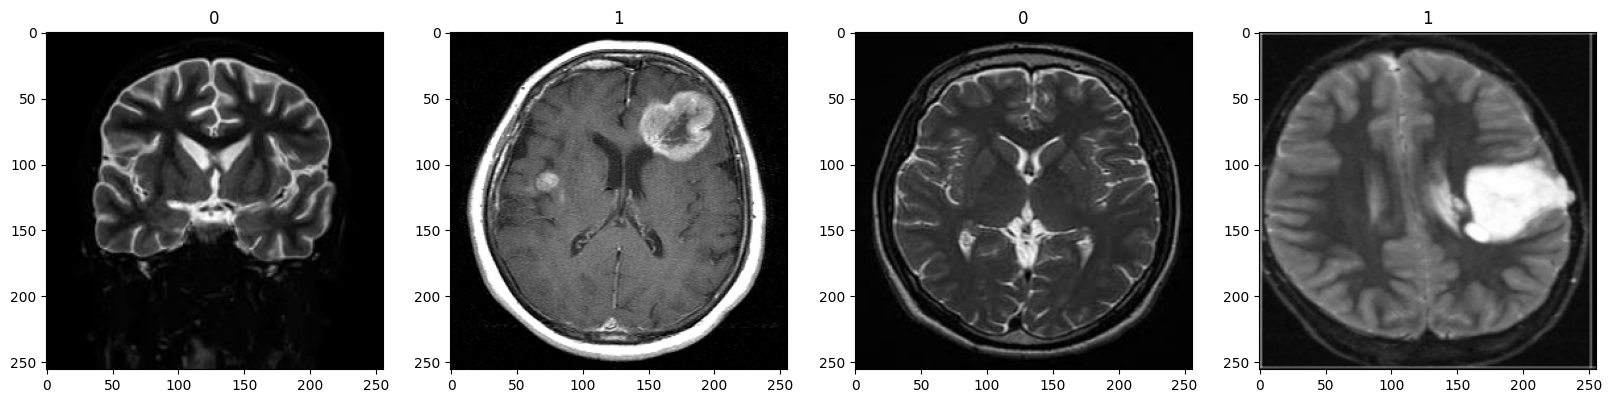

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data = data.map(lambda x, y : (x/255, y))

In [13]:
scaled = data.as_numpy_iterator()
scaled.next()[0].max()

1.0

In [14]:
len(data)

8

In [15]:
train_size = int(len(data)*.8)
test_size = int(len(data)*.3)

In [16]:
train_size , test_size

(6, 2)

In [17]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:

model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\yoshi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:

logdir='logs'


In [27]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=test, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - accuracy: 0.6960 - loss: 0.7546 - val_accuracy: 0.8525 - val_loss: 0.5199
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.7929 - loss: 0.5137 - val_accuracy: 0.8197 - val_loss: 0.4061
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.8148 - loss: 0.4421 - val_accuracy: 0.8197 - val_loss: 0.4472
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.8734 - loss: 0.3616 - val_accuracy: 0.8852 - val_loss: 0.3588
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.8474 - loss: 0.3598 - val_accuracy: 0.8852 - val_loss: 0.2967
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.8668 - loss: 0.3146 - val_accuracy: 0.9344 - val_loss: 0.2024
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.9023 - loss: 0.2398 - val_accuracy: 0.9508 - val_loss: 0.1662
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.9164 - loss: 0.1926 - val_accuracy: 0.9672 - val_loss:

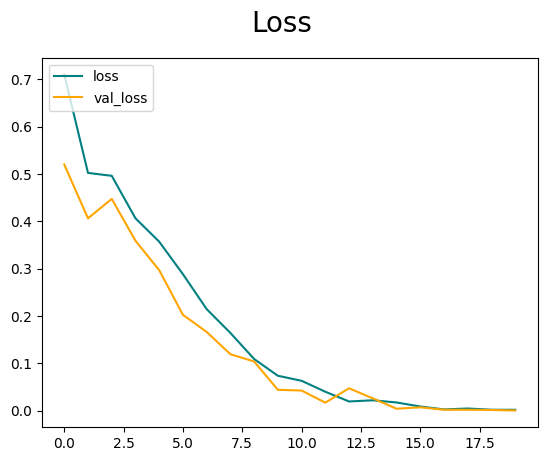

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

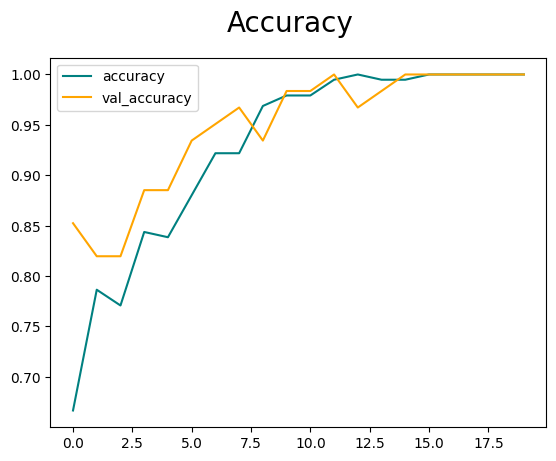

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [35]:
import cv2

In [36]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
img_path = r'C:\Users\yoshi\VPROJECTS\imageclassi\vali\no 7.jpeg'
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is not None:
    # Convert BGR image to RGB format
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    # plt.imshow(img_rgb)
    # plt.axis('off')  # Turn off axis numbers and ticks
    # plt.show()
else:
    print(f"Error loading image from '{img_path}'")


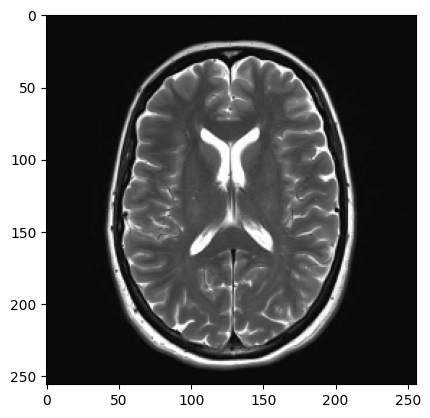

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [39]:

yhat

array([[2.1814793e-14]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is yes')
else:
    print(f'Predicted class is no')

Predicted class is no


In [41]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
img_path = r'C:\Users\yoshi\VPROJECTS\imageclassi\vali\Y15.jpg'
img = cv2.imread(img_path)

# Check if the image was loaded successfully
if img is not None:
    # Convert BGR image to RGB format
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    # plt.imshow(img_rgb)
    # plt.axis('off')  # Turn off axis numbers and ticks
    # plt.show()
else:
    print(f"Error loading image from '{img_path}'")

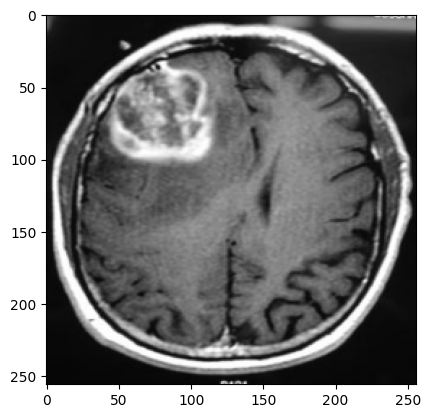

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[0.9999987]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is yes')
else:
    print(f'Predicted class is no')
    

Predicted class is yes


In [45]:

from tensorflow.keras.models import load_model

In [46]:

from tensorflow.keras.models import load_model, save_model

# Assuming 'model' is your Keras model
model_path = os.path.join('models', 'brain_tumor_classification.keras')
save_model(model, model_path)

# To load the model later
loaded_model = load_model("C:\\Users\\yoshi\\VPROJECTS\\imageclassi\\models\\brain_tumor_classification.keras")



In [48]:
loaded_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.9999987]], dtype=float32)